In [1]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import joblib
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import functions as f

### 1. Load Data

In [3]:
df91, df01 = f.load_data()

### 2. Process Data

In [4]:
pdf91 = f.process_data(df91, ['UniqueCarrier', 'Origin', 'Dest'],['Month','DayofMonth','DayOfWeek','DepTime','FlightNum','ActualElapsedTime','DepDelay','Distance','Cancelled','Diverted'], 'reg')

In [5]:
pdf01 = f.process_data(df01, ['UniqueCarrier','TailNum' ,'Origin', 'Dest'],['Month','DayofMonth','DayOfWeek','DepTime','FlightNum','ActualElapsedTime','DepDelay','Distance','TaxiIn','TaxiOut','Cancelled','Diverted'], 'reg')

In [6]:
pdf01

,UniqueCarrier,TailNum,Origin,Dest,Month,DayofMonth,DayOfWeek,DepTime,FlightNum,ActualElapsedTime,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,ArrDelay
0,10,3363,36,45,-1.564744,0.145763,-0.475404,0.947524,-0.814716,-0.566219,-0.429101,-0.650946,-0.292296,0.455833,0.0,0.0,-3.0
1,10,3417,36,45,-1.564744,0.259039,0.025112,0.945452,-0.814716,-0.453071,-0.464519,-0.650946,0.553923,0.455833,0.0,0.0,4.0
2,10,3369,36,45,-1.564744,0.372315,0.525627,0.978604,-0.814716,-0.410640,0.102172,-0.650946,-0.080741,-0.539540,0.0,0.0,23.0
3,10,3366,36,45,-1.564744,0.485591,1.026142,0.949596,-0.814716,-0.396497,-0.393683,-0.650946,-0.503850,1.152595,0.0,0.0,10.0
4,10,3721,36,45,-1.564744,0.598867,1.526657,0.955812,-0.814716,-0.297493,-0.287428,-0.650946,-0.503850,2.247505,0.0,0.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5723668,4,512,164,58,1.688005,-0.194065,0.525627,-1.335757,-0.552192,0.706694,-0.145755,0.789517,1.611696,-0.240928,0.0,0.0,4.0
5723669,4,510,164,58,1.688005,-0.080789,1.026142,-1.327469,-0.552192,0.635977,-0.004083,0.789517,0.553923,0.256759,0.0,0.0,3.0
5723670,4,506,164,58,1.688005,0.032487,1.526657,-1.435210,-0.552192,0.650120,-0.429101,0.789517,0.130813,-0.440002,0.0,0.0,-8.0
5723671,4,4206,164,58,1.688005,0.145763,-1.476434,-1.435210,-0.552192,0.706694,-0.429101,0.789517,1.400141,-0.440002,0.0,0.0,-4.0


### 3. Modeling

#### 3.1 Decision Tree

In [7]:
dt91, acc_dt91 = f.train_dt(pdf91,'reg')
dt01, acc_dt01 = f.train_dt(pdf01,'reg')

In [21]:
dt91.feature_names_in_

array(['UniqueCarrier', 'Origin', 'Dest', 'Month', 'DayofMonth',
       'DayOfWeek', 'DepTime', 'FlightNum', 'ActualElapsedTime',
       'DepDelay', 'Distance', 'Cancelled', 'Diverted'], dtype=object)

In [22]:
dt91.feature_importances_

array([0.01064774, 0.01958617, 0.01887282, 0.01101477, 0.00394306,
       0.00283782, 0.01483493, 0.01273796, 0.09152912, 0.72958833,
       0.08440728, 0.        , 0.        ])

In [8]:
acc_dt91

45.25432907474567

#### 3.1 XG Boost

In [9]:
xgb91, acc_xgb91 = f.train_xgb(pdf91,'reg')
xgb01, acc_xgb01 = f.train_xgb(pdf01,'reg')

In [ ]:
pd.DataFrame({
    'Model': ['Decision Tree', 'XGBoost'],
    'Year 91': [acc_dt91, acc_xgb91],
    'Year 01': [acc_dt01, acc_xgb01]
}).to_csv('Data/accuracies.csv',index=False)

### 4. Results


#### 4.1 Accuracies

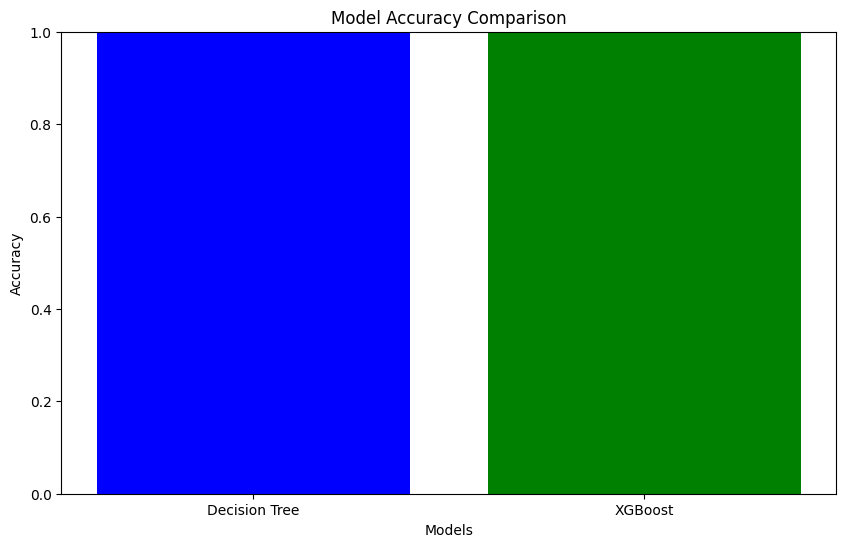

In [16]:
f.plot_model_accuracy([acc_dt91,acc_xgb91])

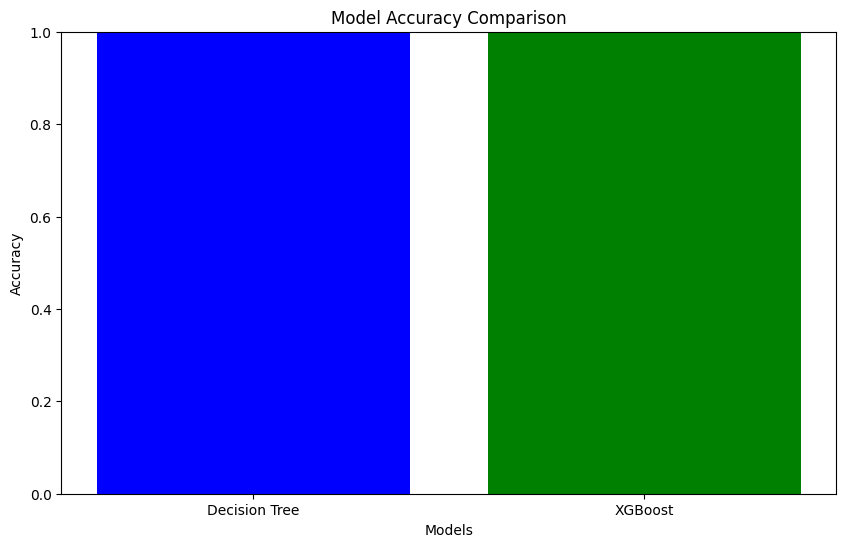

In [17]:
f.plot_model_accuracy([acc_dt01,acc_xgb01])

#### 4.2 Feature Importance

In [24]:
pdf91.sample(5)

,UniqueCarrier,Origin,Dest,Month,DayofMonth,DayOfWeek,DepTime,FlightNum,ActualElapsedTime,DepDelay,Distance,Cancelled,Diverted,ArrDelay
3849173,11,170,120,1.014321,1.058571,0.539529,-0.867628,-0.210215,-0.427366,0.065677,-0.530411,0.0,0.0,11.0
3370940,10,10,172,0.721256,-0.879355,1.544819,-1.131151,-0.179955,-0.859595,-0.181301,-0.773942,0.0,0.0,-1.0
1059756,4,170,130,-1.037136,0.830580,1.042174,1.377595,-1.025338,-0.334745,-0.280092,-0.127723,0.0,0.0,-3.0
1919487,4,72,119,-0.451005,0.374597,1.544819,0.329824,0.487652,-0.535423,-0.280092,-0.745178,0.0,0.0,-15.0
3195342,3,205,151,0.428191,-1.107346,-0.968405,-0.897142,2.042248,0.359908,-0.280092,0.660395,0.0,0.0,-7.0


In [18]:
dt_feature_importance_91 = f.analyze_dt_features(dt91, pdf91)

KeyError: "['OnTime'] not found in axis"

In [ ]:
xgb_feature_importance_91 = f.analyze_xgb_features(xgb91, pdf91)

In [ ]:
combined_feature_importance = f.combine_feature_importance_dfs(dt_feature_importance_91, xgb_feature_importance_91)

f.plot_feature_importance(combined_feature_importance)

In [ ]:
combined_feature_importance.to_csv('Data/features_importance_91.csv')

In [ ]:
dt_feature_importance_01 = f.analyze_dt_features(dt01, pdf01)

In [ ]:
xgb_feature_importance_01 = f.analyze_xgb_features(xgb01, pdf01)

In [ ]:
combined_feature_importance = f.combine_feature_importance_dfs(dt_feature_importance_01, xgb_feature_importance_01)

f.plot_feature_importance(combined_feature_importance)

In [ ]:
combined_feature_importance.to_csv('Data/features_importance_01.csv')